## Import des bibliotèques nécessaires à la visualisation et la modélisation des données présentes dans le dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import datetime as dt

from sklearn import decomposition
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from catboost import CatBoostRegressor
from collections import OrderedDict
from IPython.display import Image

## Description du dataset

In [2]:
# Chargement du dataset

incidents = pd.read_csv('/Users/sashacollome/Downloads/incident_event_log.csv', index_col = 0)

In [3]:
# Affichage des colonnes présentes dans le dataset

incidents.keys()

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at',
       'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at',
       'contact_type', 'location', 'category', 'subcategory', 'u_symptom',
       'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify',
       'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code',
       'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [4]:
# Affichage des données

incidents

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


###### Après analyse du dataset, j'ai pu constater un nombre important de données manquantes dans certaines colonnes du dataset. J'ai choisi de supprimer celles où plus de 10% des données étaient manquantes. Sur l'image suivante, nous pouvons voir les cases dans lesquelles la donnée est connue (= FALSE) et celles où la donnée est inconnue (= TRUE) :

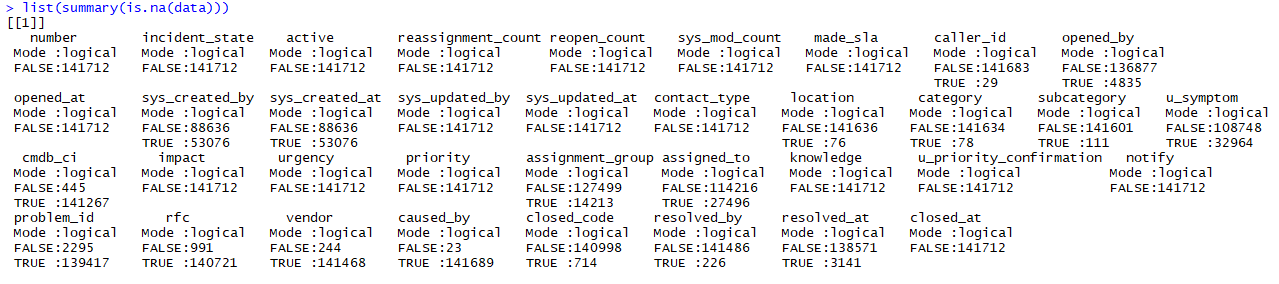

In [5]:
Image(filename="/Users/sashacollome/Downloads/Dataset_avant_nettoyage.png")

###### Cependant, certaines colonnes présentant plus de 10% de données manquantes me paraissaient importantes comme les variables "sys_created_by" et "sys_created_at". Ainsi j'ai commencé par supprimer les lignes où il manquait l'information :

In [6]:
incidents.drop(incidents[incidents['sys_created_at'] == '?'].index, inplace = True)

###### J'ai relancé l'analyse faite précédemment afin de revérifier l'état des autres colonnes :

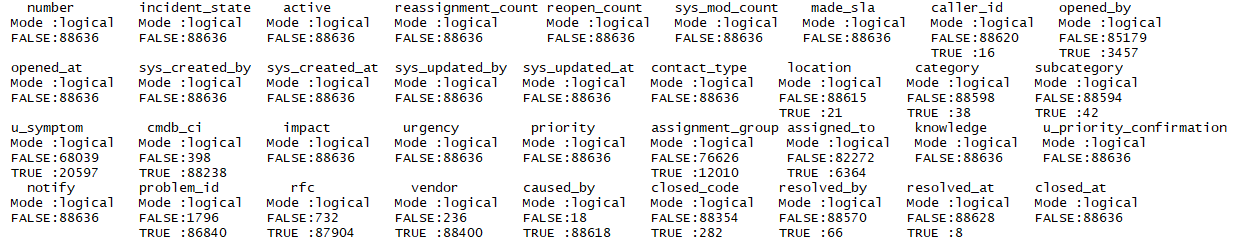

In [7]:
Image(filename="/Users/sashacollome/Downloads/Dataset_après_nettoyage.png")

###### Les deux colonnes "sys_created_by" et "sys_created_at" désormais complètes, j'ai pu déterminer les variables où 10% (ou plus) des données manquaient et je les ai supprimé :

In [8]:
incidents = incidents.drop(["caused_by", "vendor", "rfc", "problem_id", "u_symptom", "cmdb_ci"], axis=1)

In [9]:
incidents

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [10]:
# Affichage des informations sur les différentes colonnes du dataset

incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88636 entries, INC0000045 to INC0113694
Data columns (total 29 columns):
incident_state             88636 non-null object
active                     88636 non-null bool
reassignment_count         88636 non-null int64
reopen_count               88636 non-null int64
sys_mod_count              88636 non-null int64
made_sla                   88636 non-null bool
caller_id                  88636 non-null object
opened_by                  88636 non-null object
opened_at                  88636 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             88636 non-null object
sys_updated_at             88636 non-null object
contact_type               88636 non-null object
location                   88636 non-null object
category                   88636 non-null object
subcategory                88636 non-null object
impact                     88636 non-null object
urgency

###### La fonction suivante a été créée afin de calculer le nombre de jours séparant deux dates passées en paramètres, au format DD/MM/YYYY hh:mm. Le nombre obtenu est placé dans une variable de type float :

In [11]:
import datetime
def duree_incident(date_from, date_to):  
    DATETIME_FORMAT = "%d/%m/%Y %H:%M"
    from_dt = datetime.datetime.strptime(date_from, DATETIME_FORMAT)
    to_dt = datetime.datetime.strptime(date_to, DATETIME_FORMAT)
    timedelta = to_dt - from_dt
    diff_day = timedelta.days + float(timedelta.seconds) / 86400
    return diff_day

###### Un exemple :

In [12]:
duree_incident("25/1/2017 16:59", "26/1/2017 16:59")

1.0

###### On crée alors une nouvelle colonne "duree_incident" et on applique la fonction créée en prenant en paramètres les variables "sys_created_at" et "closed_at" de chaque ligne afin de déterminer le nombre de jours nécessaires pour résoudre le problème rencontré :

In [13]:
incidents['duree_incident'] = incidents.apply(lambda row: duree_incident(row.sys_created_at, row.closed_at), axis = 1)

In [14]:
# Vérification de l'ajout de la nouvelle colonne

incidents.keys()

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at',
       'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at',
       'contact_type', 'location', 'category', 'subcategory', 'impact',
       'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'resolved_at', 'closed_at', 'duree_incident'],
      dtype='object')

###### Afin de pouvoir appliquer un algorithme de régression au dataset, il faut que les données soient numériques. Pour cela, j'ai modifié le contenu des différentes colonnes affichant des données non numériques. Je détaillerai la démarche avec la colonne "caller_id".

In [15]:
# Suppression du début de la chaine de caractères grâce à la fonction lstrip().

incidents['caller_id'] = incidents['caller_id'].map(lambda x: x.lstrip('Caller '))

In [16]:
# Suppression des données incomplètes s'il y en a.

incidents.drop(incidents[incidents['caller_id'] == '?'].index, inplace = True)

In [17]:
# Conversion de la chaine de caractères composée uniquement de nombre en int.

incidents['caller_id'] = pd.to_numeric(incidents['caller_id'])

In [18]:
# On peut voir que caller_id est passé d'object à int64.

incidents.dtypes

incident_state              object
active                        bool
reassignment_count           int64
reopen_count                 int64
sys_mod_count                int64
made_sla                      bool
caller_id                    int64
opened_by                   object
opened_at                   object
sys_created_by              object
sys_created_at              object
sys_updated_by              object
sys_updated_at              object
contact_type                object
location                    object
category                    object
subcategory                 object
impact                      object
urgency                     object
priority                    object
assignment_group            object
assigned_to                 object
knowledge                     bool
u_priority_confirmation       bool
notify                      object
closed_code                 object
resolved_by                 object
resolved_at                 object
closed_at           

In [19]:
# Vérification en affichant le dataset.

incidents

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,duree_incident
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,New,True,0,0,0,True,2403,Opened by 8,29/2/2016 01:16,Created by 6,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,Resolved,True,0,0,2,True,2403,Opened by 8,29/2/2016 01:16,Created by 6,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,Resolved,True,0,0,3,True,2403,Opened by 8,29/2/2016 01:16,Created by 6,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,Closed,False,0,0,4,True,2403,Opened by 8,29/2/2016 01:16,Created by 6,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000047,New,True,0,0,0,True,2403,Opened by 397,29/2/2016 04:40,Created by 171,...,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,1,True,2403,Opened by 397,29/2/2016 04:40,Created by 171,...,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,2,True,2403,Opened by 397,29/2/2016 04:40,Created by 171,...,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,3,True,2403,Opened by 397,29/2/2016 04:40,Created by 171,...,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,4,True,2403,Opened by 397,29/2/2016 04:40,Created by 171,...,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00,6.210417


###### Je procède à la même démarche pour toutes les colonnes comportant des données non numériques.

In [20]:
incidents['opened_by'] = incidents['opened_by'].map(lambda x: x.lstrip('Opened by '))

In [21]:
incidents.drop(incidents[incidents['opened_by'] == '?'].index, inplace = True)

In [22]:
incidents['opened_by'] = pd.to_numeric(incidents['opened_by'])

In [23]:
incidents['sys_created_by'] = incidents['sys_created_by'].map(lambda x: x.lstrip('Created by '))

In [24]:
incidents.drop(incidents[incidents['sys_created_by'] == '?'].index, inplace = True)

In [25]:
incidents['sys_created_by'] = pd.to_numeric(incidents['sys_created_by'])

In [26]:
incidents['sys_updated_by'] = incidents['sys_updated_by'].map(lambda x: x.lstrip('Updated by '))

In [27]:
incidents.drop(incidents[incidents['sys_updated_by'] == '?'].index, inplace = True)

In [28]:
incidents['sys_updated_by'] = pd.to_numeric(incidents['sys_updated_by'])

In [29]:
incidents['location'] = incidents['location'].map(lambda x: x.lstrip('Location '))

In [30]:
incidents.drop(incidents[incidents['location'] == '?'].index, inplace = True)

In [31]:
incidents['location'] = pd.to_numeric(incidents['location'])

In [32]:
incidents['category'] = incidents['category'].map(lambda x: x.lstrip('Category '))

In [33]:
incidents.drop(incidents[incidents['category'] == '?'].index, inplace = True)

In [34]:
incidents['category'] = pd.to_numeric(incidents['category'])

In [35]:
incidents['subcategory'] = incidents['subcategory'].map(lambda x: x.lstrip('Subcategory '))

In [36]:
incidents.drop(incidents[incidents['subcategory'] == '?'].index, inplace = True)

In [37]:
incidents['subcategory'] = pd.to_numeric(incidents['subcategory'])

In [38]:
incidents['closed_code'] = incidents['closed_code'].map(lambda x: x.lstrip('code '))

In [39]:
incidents.drop(incidents[incidents['closed_code'] == '?'].index, inplace = True)

In [40]:
incidents['closed_code'] = pd.to_numeric(incidents['closed_code'])

In [41]:
incidents['resolved_by'] = incidents['resolved_by'].map(lambda x: x.lstrip('Resolved by '))

In [42]:
incidents.drop(incidents[incidents['resolved_by'] == '?'].index, inplace = True)

In [43]:
incidents['resolved_by'] = pd.to_numeric(incidents['resolved_by'])

###### Petit changement par rapport aux colonnes précédentes : utilisation de la fonction rstrip(). Celle-ci permet la suppression des caractères qui se trouvent à la fin d'une chaine. Je l'utilise pour les colonnes "impact", "urgency" et "priority".

In [44]:
incidents['impact'] = incidents['impact'].map(lambda x: x.rstrip(' - High'))

In [45]:
incidents['impact'] = incidents['impact'].map(lambda x: x.rstrip(' - Medium'))

In [46]:
incidents['impact'] = incidents['impact'].map(lambda x: x.rstrip(' - Low'))

In [47]:
incidents['urgency'] = incidents['urgency'].map(lambda x: x.rstrip(' - High'))

In [48]:
incidents['urgency'] = incidents['urgency'].map(lambda x: x.rstrip(' - Medium'))

In [49]:
incidents['urgency'] = incidents['urgency'].map(lambda x: x.rstrip(' - Low'))

In [50]:
incidents['priority'] = incidents['priority'].map(lambda x: x.rstrip(' - Critical'))

In [51]:
incidents['priority'] = incidents['priority'].map(lambda x: x.rstrip(' - High'))

In [52]:
incidents['priority'] = incidents['priority'].map(lambda x: x.rstrip(' - Moderate'))

In [53]:
incidents['priority'] = incidents['priority'].map(lambda x: x.rstrip(' - Low'))

In [54]:
incidents.drop(incidents[incidents['impact'] == '?'].index, inplace = True)

In [55]:
incidents.drop(incidents[incidents['urgency'] == '?'].index, inplace = True)

In [56]:
incidents.drop(incidents[incidents['priority'] == '?'].index, inplace = True)

In [57]:
incidents['impact'] = pd.to_numeric(incidents['impact'])

In [58]:
incidents['urgency'] = pd.to_numeric(incidents['urgency'])

In [59]:
incidents['priority'] = pd.to_numeric(incidents['priority'])

###### Nouvelle spécificité pour les colonnes "assignment_group" et "assigned_to". Comme nous l'avions vu sur les photos plus haut, ces variables possédaient de nombreuses données manquantes et auraient pu être supprimées. J'ai choisi de les conserver et d'assigner de nouvelles valeurs pour remplacer les données manquantes.

In [60]:
# Les données manquantes prennent la valeur "Group 0"

incidents["assignment_group"]= incidents["assignment_group"].replace("?", "Group 0")

In [61]:
# Même démarche qu'avant

incidents['assignment_group'] = incidents['assignment_group'].map(lambda x: x.lstrip('Group '))

In [62]:
incidents['assignment_group'] = pd.to_numeric(incidents['assignment_group'])

In [63]:
# Les données manquantes prennent la valeur "Resolver 0"

incidents["assigned_to"]= incidents["assigned_to"].replace("?", "Resolver 0") 

In [64]:
incidents['assigned_to'] = incidents['assigned_to'].map(lambda x: x.lstrip('Resolver '))

In [65]:
incidents['assigned_to'] = pd.to_numeric(incidents['assigned_to'])

In [66]:
incidents

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,duree_incident
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,New,True,0,0,0,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,Resolved,True,0,0,2,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,Resolved,True,0,0,3,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,Closed,False,0,0,4,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000047,New,True,0,0,0,True,2403,397,29/2/2016 04:40,171,...,70,89,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,1,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,2,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,3,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,Active,True,1,0,4,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417


###### Dans la description du dataset, il était indiqué que la colonne "incident_state" comptait 8 valeurs possibles définissant l'état dans lequel se trouvait l'incident. Cependant, j'ai constaté que certains incidents avaient pour valeur '-100' pour cette variable. Incohérente par rapport aux autres valeurs, j'ai choisi de supprimer les lignes où cet état était indiqué.

In [67]:
incidents.drop(incidents[incidents['incident_state'] == '-100'].index, inplace = True)

In [68]:
# Vérification : 8 valeurs possibles pour la variable "incident_state"

print(pd.value_counts(incidents["incident_state"]))

Active                25455
New                   22591
Resolved              13303
Closed                12942
Awaiting User Info     9586
Awaiting Vendor         599
Awaiting Problem        309
Awaiting Evidence        31
Name: incident_state, dtype: int64


###### Nous pouvons voir que notre dataset comporte encore des données non numériques qui ne pourront pas être utilisées par l'algorithme de régression.

In [69]:
incidents.dtypes

incident_state              object
active                        bool
reassignment_count           int64
reopen_count                 int64
sys_mod_count                int64
made_sla                      bool
caller_id                    int64
opened_by                    int64
opened_at                   object
sys_created_by               int64
sys_created_at              object
sys_updated_by               int64
sys_updated_at              object
contact_type                object
location                     int64
category                     int64
subcategory                  int64
impact                       int64
urgency                      int64
priority                     int64
assignment_group             int64
assigned_to                  int64
knowledge                     bool
u_priority_confirmation       bool
notify                      object
closed_code                  int64
resolved_by                  int64
resolved_at                 object
closed_at           

###### Pour remédier à cela, nous utilisons la fonction LabelEncoder(). Elle permet de transformer les valeurs d'une colonne en données numériques.

In [70]:
enc = LabelEncoder()

In [71]:
incidents['incident_state'] = enc.fit_transform(incidents['incident_state'])

###### On peut ainsi voir que les valeurs prises par les incidents dans la colonne "incident_state" ne sont plus {New, Closed …} mais des données numériques où chaque ancien état correspond à un chiffre.

In [72]:
incidents

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,duree_incident
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,6,True,0,0,0,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,7,True,0,0,2,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,7,True,0,0,3,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000045,5,False,0,0,4,True,2403,8,29/2/2016 01:16,6,...,56,0,True,False,Do Not Notify,5,149,29/2/2016 11:29,5/3/2016 12:00,5.442361
INC0000047,6,True,0,0,0,True,2403,397,29/2/2016 04:40,171,...,70,89,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,0,True,1,0,1,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,0,True,1,0,2,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,0,True,1,0,3,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417
INC0000047,0,True,1,0,4,True,2403,397,29/2/2016 04:40,171,...,24,31,True,False,Do Not Notify,5,81,1/3/2016 09:52,6/3/2016 10:00,6.210417


In [73]:
# Même chose pour la colonne "contact_type"

incidents['contact_type'] = enc.fit_transform(incidents['contact_type'])

In [74]:
# Même chose pour la colonne "notify"

incidents['notify'] = enc.fit_transform(incidents['notify'])

In [75]:
# Je convertis le float en int afin qu'il soit accepté par la matrice de correlation.

incidents.duree_incident = incidents.duree_incident.astype(int)

###### On trouve encore des variables de type object qui ne seront pas utilisées par l'algorithme. Celles-ci correspondent aux variables indiquant des dates.

In [76]:
incidents.dtypes

incident_state              int64
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                   int64
opened_by                   int64
opened_at                  object
sys_created_by              int64
sys_created_at             object
sys_updated_by              int64
sys_updated_at             object
contact_type                int64
location                    int64
category                    int64
subcategory                 int64
impact                      int64
urgency                     int64
priority                    int64
assignment_group            int64
assigned_to                 int64
knowledge                    bool
u_priority_confirmation      bool
notify                      int64
closed_code                 int64
resolved_by                 int64
resolved_at                object
closed_at                  object
duree_incident

###### On utilise alors deux fonctions permettant de convertir les dates en int.

In [77]:
incidents['opened_at'] = pd.to_datetime(incidents['opened_at'])
incidents['opened_at'] = incidents['opened_at'].map(dt.datetime.toordinal)

In [78]:
incidents['sys_created_at'] = pd.to_datetime(incidents['sys_created_at'])
incidents['sys_created_at'] = incidents['sys_created_at'].map(dt.datetime.toordinal)

In [79]:
incidents['sys_updated_at'] = pd.to_datetime(incidents['sys_updated_at'])
incidents['sys_updated_at'] = incidents['sys_updated_at'].map(dt.datetime.toordinal)

In [80]:
incidents['resolved_at'] = pd.to_datetime(incidents['resolved_at'])
incidents['resolved_at'] = incidents['resolved_at'].map(dt.datetime.toordinal)

In [81]:
incidents['closed_at'] = pd.to_datetime(incidents['closed_at'])
incidents['closed_at'] = incidents['closed_at'].map(dt.datetime.toordinal)

###### Toutes les données sont désormais exploitables par l'algorithme.

In [82]:
incidents.dtypes

incident_state             int64
active                      bool
reassignment_count         int64
reopen_count               int64
sys_mod_count              int64
made_sla                    bool
caller_id                  int64
opened_by                  int64
opened_at                  int64
sys_created_by             int64
sys_created_at             int64
sys_updated_by             int64
sys_updated_at             int64
contact_type               int64
location                   int64
category                   int64
subcategory                int64
impact                     int64
urgency                    int64
priority                   int64
assignment_group           int64
assigned_to                int64
knowledge                   bool
u_priority_confirmation     bool
notify                     int64
closed_code                int64
resolved_by                int64
resolved_at                int64
closed_at                  int64
duree_incident             int64
dtype: obj

###### On commence par réaliser une matrice de corrélation sur le dataset afin de déterminer les variables que nous intégrerons dans le training set du modèle. Pour cela, on utilise la fonction corr().

In [83]:
corr = incidents.corr()
corr.style.background_gradient(cmap='coolwarm')

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,duree_incident
incident_state,1,-0.180291,-0.134104,-0.0660664,-0.0317492,-0.117489,0.000694259,0.0255621,-0.00219211,0.0248927,-0.00222263,0.0603469,0.0128621,0.00814997,-0.0210709,0.0229622,0.0343607,-0.0084406,-0.00360724,-0.00938962,0.0142202,0.0618394,-0.0549758,0.40355,0.00834745,0.00731696,0.0177074,0.00902491,0.022645,-0.0529839
active,-0.180291,1,0.000733645,0.0107975,-0.138114,0.656576,0.00671202,-0.0207334,0.000957781,-0.0209926,0.000980863,-0.514611,-0.0167371,0.00158208,-0.00363559,-0.0199899,-0.0161471,-0.00873293,-0.00654888,-0.00937556,0.0800844,-0.0226645,0.0247869,-0.509343,-0.00389263,0.000595199,-0.00709528,0.00545484,0.00413921,0.0417747
reassignment_count,-0.134104,0.000733645,1,0.0922436,0.460345,-0.0702624,0.0066055,-0.0574851,-0.00964275,-0.0574577,-0.00962936,0.0357398,0.0015092,-0.0155637,-0.0185139,0.0064312,-0.034796,0.0121267,0.0114833,0.0106411,-0.0808031,-0.0915442,0.0652043,0.0287375,-0.00275844,6.10757e-05,-0.0298929,-0.00320304,-0.00770791,0.113526
reopen_count,-0.0660664,0.0107975,0.0922436,1,0.198011,-0.0155385,0.00500283,-0.00212624,-0.00345409,-0.00362605,-0.0034514,0.0151419,-0.00768696,-0.00859122,0.00356491,-0.0386209,-0.0195726,-0.00397401,0.00574829,0.00603377,-0.0100269,-0.00951314,0.0137092,0.133208,-0.00198214,-0.0324847,-0.0242991,-0.0114085,0.0215734,0.0368237
sys_mod_count,-0.0317492,-0.138114,0.460345,0.198011,1,-0.232492,0.0174213,-0.0134224,-0.0124216,-0.0151618,-0.0123959,0.133116,0.113864,0.0182103,0.0110378,-0.00277378,-0.0303737,-0.000581703,9.97133e-06,-0.0028008,-0.137483,-0.015661,0.036258,0.230116,-0.00566735,-0.027537,-0.000699628,0.141089,0.137572,0.599196
made_sla,-0.117489,0.656576,-0.0702624,-0.0155385,-0.232492,1,-0.00342654,-0.0144539,-0.0188037,-0.0149856,-0.0188418,-0.339078,0.014964,-0.00340991,0.00188489,-0.00989491,0.00276783,0.0424077,0.0466782,0.0496893,0.0905142,0.00911015,-0.0557777,-0.283256,-0.00885879,-0.00240564,0.0208741,-0.0325258,0.0277764,-0.0768664
caller_id,0.000694259,0.00671202,0.0066055,0.00500283,0.0174213,-0.00342654,1,0.0659306,0.00138646,0.0653131,0.00123296,0.030978,0.00518263,0.00184175,-0.0178907,-0.0161769,-0.0201467,-0.0137114,-0.0335459,-0.0231199,-0.0285232,0.0400377,0.000724983,-0.0108316,0.0210907,-0.00141318,0.0278982,-0.00933995,0.0156971,0.0217953
opened_by,0.0255621,-0.0207334,-0.0574851,-0.00212624,-0.0134224,-0.0144539,0.0659306,1,-0.0867751,0.9984,-0.086725,0.23903,-0.0436413,0.0496394,-0.0132091,0.0339905,0.0124905,0.0258365,-0.0243906,-0.0228158,0.00506023,0.0660468,0.101164,0.00950792,0.0340753,-0.00301142,0.0836092,-0.0333246,0.00587833,0.0131147
opened_at,-0.00219211,0.000957781,-0.00964275,-0.00345409,-0.0124216,-0.0188037,0.00138646,-0.0867751,1,-0.0822426,0.999914,-0.0270711,0.55592,0.242373,0.00309417,-0.0162257,-0.0143359,-0.0138379,-0.0123425,-0.00575218,-0.00785244,-0.0133445,0.0396904,0.00850715,-0.00671882,-0.00934665,-0.0046901,0.381943,0.000644386,-0.00883427
sys_created_by,0.0248927,-0.0209926,-0.0574577,-0.00362605,-0.0151618,-0.0149856,0.0653131,0.9984,-0.0822426,1,-0.0821664,0.239258,-0.0411137,0.051284,-0.0135143,0.0334582,0.0121365,0.0255304,-0.0247836,-0.0238921,0.00537319,0.0646535,0.105052,0.00877512,0.0347058,-0.00263835,0.0825488,-0.0325037,0.00372811,0.0117964


In [84]:
incidents

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,duree_incident
number,,,,,,,,,,,,,,,,,,,,,
INC0000045,6,True,0,0,0,True,2403,8,736023,6,...,56,0,True,False,0,5,149,736023,736087,5
INC0000045,7,True,0,0,2,True,2403,8,736023,6,...,56,0,True,False,0,5,149,736023,736087,5
INC0000045,7,True,0,0,3,True,2403,8,736023,6,...,56,0,True,False,0,5,149,736023,736087,5
INC0000045,5,False,0,0,4,True,2403,8,736023,6,...,56,0,True,False,0,5,149,736023,736087,5
INC0000047,6,True,0,0,0,True,2403,397,736023,171,...,70,89,True,False,0,5,81,735966,736118,6
INC0000047,0,True,1,0,1,True,2403,397,736023,171,...,24,31,True,False,0,5,81,735966,736118,6
INC0000047,0,True,1,0,2,True,2403,397,736023,171,...,24,31,True,False,0,5,81,735966,736118,6
INC0000047,0,True,1,0,3,True,2403,397,736023,171,...,24,31,True,False,0,5,81,735966,736118,6
INC0000047,0,True,1,0,4,True,2403,397,736023,171,...,24,31,True,False,0,5,81,735966,736118,6


###### D'après la matrice de corrélation et les valeurs indiquées, 6 variables sont intéressantes pour construire un modèle permettant la prédiction du temps nécessaire à la résolution d'un incident :

In [85]:
X = incidents[['reassignment_count', 'sys_mod_count', 'sys_updated_at', 'knowledge', 'resolved_at', 'closed_at']]

###### Dans Y, nous plaçons la variable que nous souhaitons prédire :

In [86]:
Y = incidents.duree_incident

In [87]:
X.shape, Y.shape

((84816, 6), (84816,))

###### On split en échantillons d'apprentissages et de test :

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)

In [89]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((63612, 6), (21204, 6), (63612,), (21204,))

In [90]:
[tuple_[0]/X.shape[0] for tuple_ in (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)]

[0.75, 0.25, 0.75, 0.25]

In [91]:
performances = dict()

## Data-visualisation

###### Quelques graphiques permettant d'extraire des informations du dataset :

###### Ce graphique permet de se rendre compte que les incidents qui prennent le plus de temps à résoudre sont généralement ceux qui ont une priorité élevée. De plus, le paramètre "hue = 'knowledge'" permet de voir que les incidents ayant la plus haute priorité sont souvent résolus en s'aidant d'un document (knowledge = TRUE), alors que les incidents de faibles priorités (= 1 ou 2) sont quasiment toujours résolus sans l'aide de document par l'entreprise.

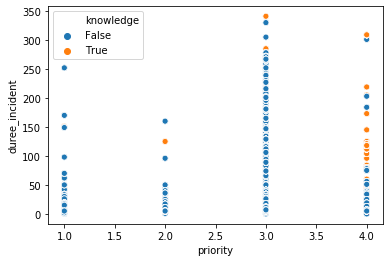

In [92]:
sns.scatterplot(x='priority', y='duree_incident', hue='knowledge', data=incidents)

###### Ce graphique permet de voir la répartition des incidents rencontrés et de leur temps de résolution en fonction de la catégorie du problème. En connaissant la signification des catégories, il serait alors possible de déterminer les incidents les plus fréquents.

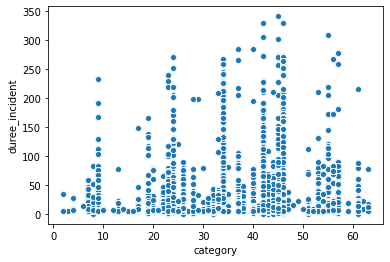

In [93]:
sns.scatterplot(x='category', y='duree_incident', data=incidents)

###### Enfin, un dernier graphique permettant de voir quel lieu a déclaré le plus d'incidents et ceux qui ont duré le plus longtemps. Ce graphique pourrait aider l'entreprise dans son organisation, en envoyant/embauchant un salarié spécialisé dans la résolution d'un incident donné à une localisation où celui-ci est fréquemment rencontré et/ou il impacte fortement le service.

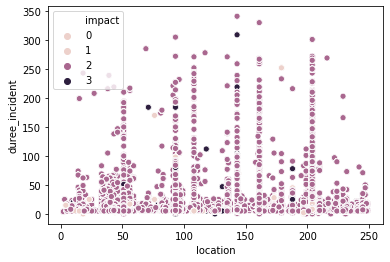

In [94]:
sns.scatterplot(x='location', y='duree_incident', hue='impact', data=incidents)

## Modelisation

###### On commence par un algorithme de régression linéaire :

In [95]:
algorithme = LinearRegression()
algorithme.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

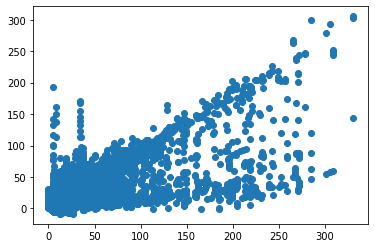

In [96]:
%matplotlib inline
plt.scatter(x=Y_test, y=algorithme.predict(X_test))

In [97]:
algorithme.coef_

array([-3.46933913,  2.39316289, -0.03794885,  8.67825636,  0.07100125,
        0.04851676])

In [98]:
performances[algorithme] = algorithme.score(X_test, Y_test)

In [99]:
def get_score(algorithme, X_train, X_test, Y_train, Y_test, display_graph=False, display_options=True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  Y_train:{} ,  Y_test:{}".format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))
    modele = algorithme.fit(X_train, Y_train)
    score  = modele.score(X_test, Y_test)
    if display_graph:
        import matplotlib.pyplot as plt
        plt.scatter(x=Y_test, y=algorithme.predict(X_test))
    return score

In [100]:
get_score(LinearRegression(), *train_test_split(X, Y, random_state=1234))

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)


0.4382919378259909

In [101]:
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [102]:
get_score(LinearRegression(), X_train, X_test, Y_train, Y_test)

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)


0.43829193782598924

In [103]:
results = cross_val_score(LinearRegression(), X, Y, cv=3)
display(results, results.mean(), results.std())

array([0.1537205 , 0.47399468, 0.42852166])

0.3520789483400786

0.1414838112349989

In [104]:
results = cross_val_score(LinearRegression(), X, Y, cv=5)
display(results, results.mean(), results.std())

array([0.03548239, 0.44282368, 0.45529517, 0.49876087, 0.38809667])

0.36409175650250697

0.16805528903221678

In [105]:
results = cross_val_score(LinearRegression(), X, Y, cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.45172254, 0.42431889, 0.47302323, 0.44991479, 0.44304315])

0.44840452112584694

0.015673114954480184

In [106]:
def multiple_cross_val_scores(algorithme, X, Y):
    import numpy as np
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, Y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

In [107]:
test = multiple_cross_val_scores(DecisionTreeRegressor(),X, Y)
test = pd.DataFrame(test, index=["mean", "std"]).T
test

,mean,std
3,0.903900,0.009479
23,0.932732,0.017244
43,0.933663,0.022207
63,0.935314,0.029553
83,0.934733,0.032429


In [108]:
new_index = [str(x) + " folds" for x in test.index]
test.index = new_index

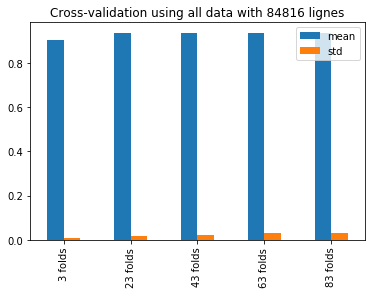

In [109]:
test.plot(kind='bar', title='Cross-validation using all data with {} lignes'.format(X.shape[0]))

###### On passe à un DecisionTreeRegressor

In [110]:
algorithme = DecisionTreeRegressor()
algorithme.fit(X_train, Y_train)
score = algorithme.score(X_test, Y_test)
performances[algorithme] = score

In [111]:
get_score(DecisionTreeRegressor(), *train_test_split(X, Y, random_state=1234))

fitting :
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)


0.8953944557745837

###### RandomForestRegressor() #1

In [112]:
hyperparametres = { 'n_estimators':30 }
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score
get_score(RandomForestRegressor(), *train_test_split(X, Y, random_state=1234))

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)
fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      v

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9352385040704579

###### RandomForestRegressor() #2

In [113]:
hyperparametres = {"n_estimators"  :  30, "max_features"  :  3, "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score
get_score(RandomForestRegressor(), *train_test_split(X, Y, random_state=1234))

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)
fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9285752960260566

###### ExtraTreesRegressor()

In [114]:
algorithme = ExtraTreesRegressor()
score      = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score
get_score(ExtraTreesRegressor(), *train_test_split(X, Y, random_state=1234))

fitting :
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fitting :
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9258433554857571

###### SVR

In [115]:
algorithme = svm.SVR(kernel='linear')
score      = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score
print(score)

fitting :
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
X_train:(63612, 6) , X_test:(21204, 6) ,  Y_train:(63612,) ,  Y_test:(21204,)
0.3289009426032271


###### CatBoostRegressor()

In [116]:
algorithme = CatBoostRegressor(task_type="CPU")
modele     = algorithme.fit(X_train, Y_train)
score      = algorithme.score(X_test, Y_test)
performances['CatBoostRegressor'] = score

0:	learn: 30.1992529	total: 66.5ms	remaining: 1m 6s
1:	learn: 29.7062631	total: 77.8ms	remaining: 38.8s
2:	learn: 29.2388155	total: 90.1ms	remaining: 30s
3:	learn: 28.7897739	total: 107ms	remaining: 26.5s
4:	learn: 28.3383642	total: 125ms	remaining: 24.8s
5:	learn: 27.9167938	total: 137ms	remaining: 22.8s
6:	learn: 27.5087372	total: 148ms	remaining: 21s
7:	learn: 27.1149000	total: 163ms	remaining: 20.2s
8:	learn: 26.7233597	total: 178ms	remaining: 19.6s
9:	learn: 26.3567400	total: 194ms	remaining: 19.2s
10:	learn: 26.0123156	total: 210ms	remaining: 18.9s
11:	learn: 25.6671610	total: 227ms	remaining: 18.7s
12:	learn: 25.3429428	total: 242ms	remaining: 18.4s
13:	learn: 25.0288849	total: 254ms	remaining: 17.9s
14:	learn: 24.7211474	total: 266ms	remaining: 17.5s
15:	learn: 24.4344449	total: 283ms	remaining: 17.4s
16:	learn: 24.1593129	total: 299ms	remaining: 17.3s
17:	learn: 23.8785897	total: 313ms	remaining: 17.1s
18:	learn: 23.6205027	total: 329ms	remaining: 17s
19:	learn: 23.3458954	tot

###### Comparaison des algorithmes

In [117]:
dico_ordonne = OrderedDict(performances)
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

,perf,algo
nom_algo,,
LinearRegression,0.438292,"LinearRegression(copy_X=True, fit_intercept=Tr..."
DecisionTreeRegressor,0.895907,"DecisionTreeRegressor(criterion='mse', max_dep..."
RandomForestRegressor,0.936933,"(DecisionTreeRegressor(criterion='mse', max_de..."
RandomForestRegressor,0.943901,"(DecisionTreeRegressor(criterion='mse', max_de..."
ExtraTreesRegressor,0.937502,"(ExtraTreeRegressor(criterion='mse', max_depth..."
SVR,0.328901,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3..."
CatBoostRegressor,0.923083,CatBoostRegressor


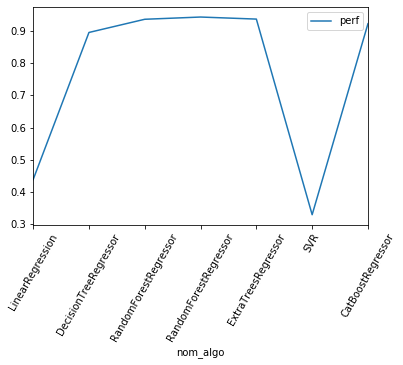

In [118]:
df[["perf"]].plot(kind='line', rot=60)